In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the datasets
file_2018 = '2018.csv'
file_2019 = '2019.csv'

data_2018 = pd.read_csv(file_2018)
data_2019 = pd.read_csv(file_2019)



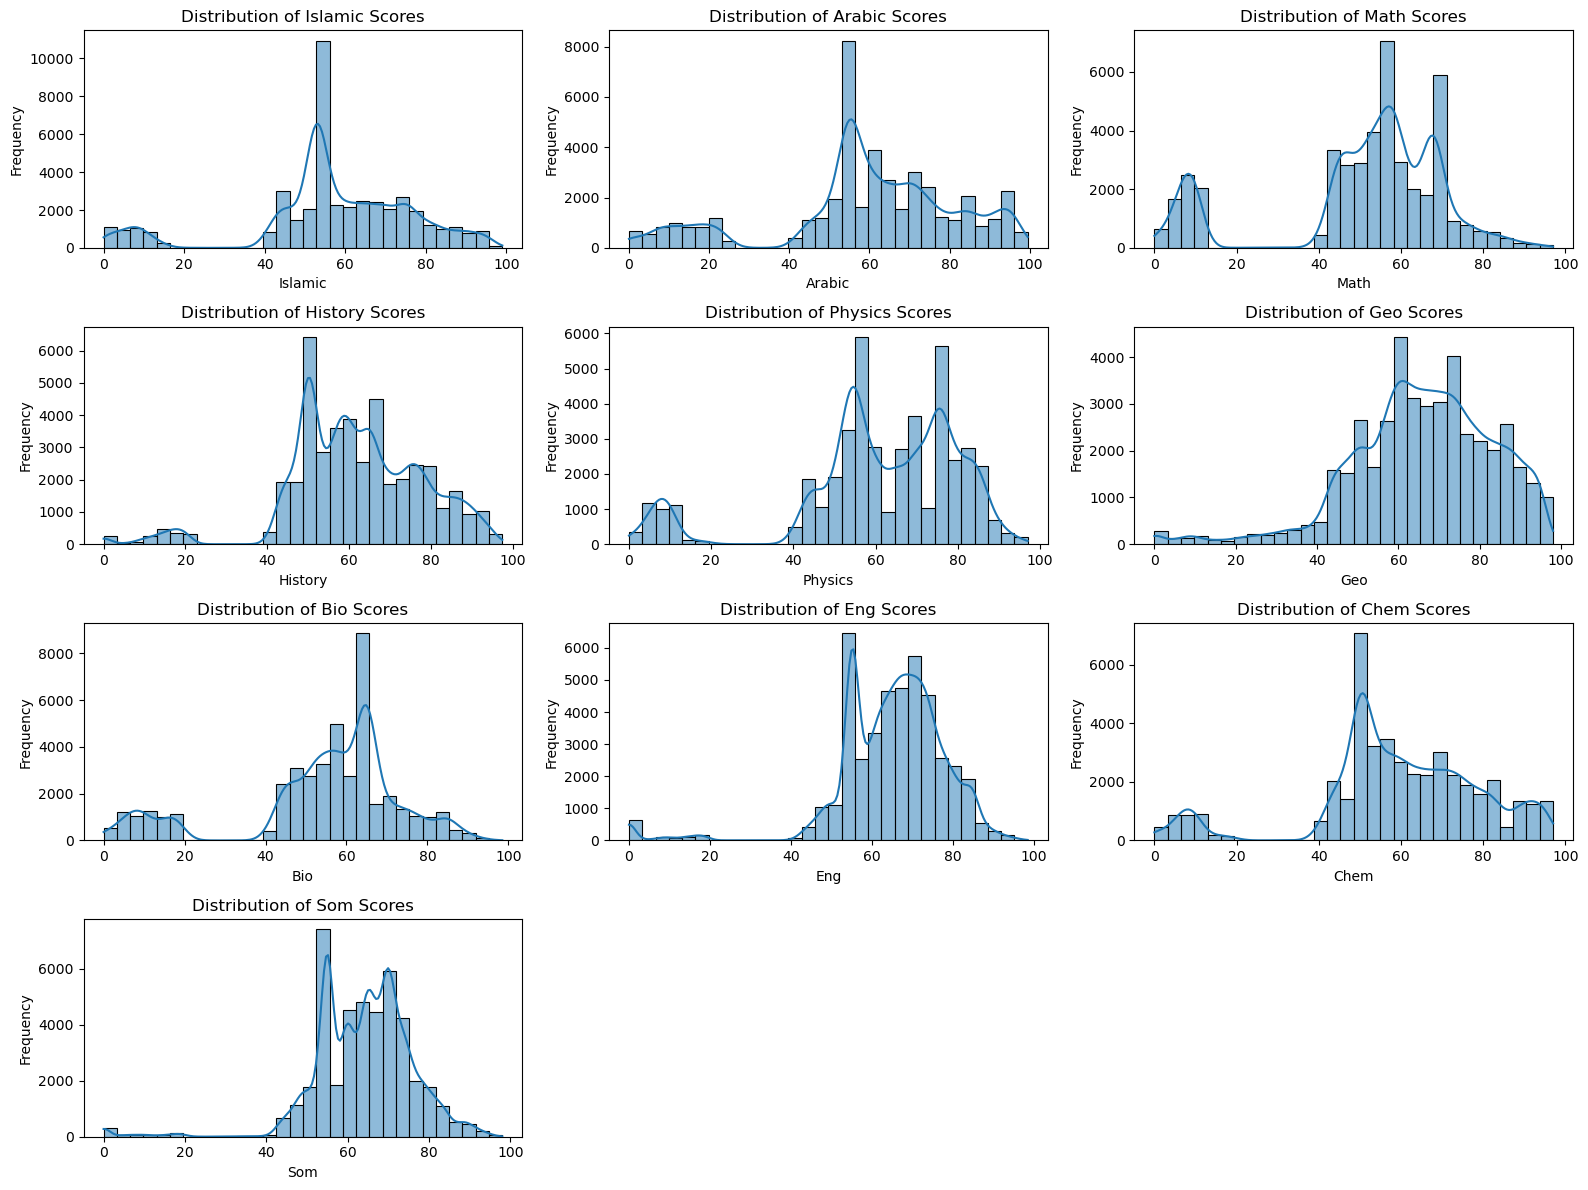

In [5]:
# Combine the datasets
combined_data = pd.concat([data_2018, data_2019], ignore_index=True)

# Summary statistics for numerical columns
summary_stats = combined_data.describe()

# Initialize label encoder
le = LabelEncoder()

# Encode 'Decision' and 'Gender'
combined_data['Decision'] = le.fit_transform(combined_data['Decision'])
combined_data['Gender'] = le.fit_transform(combined_data['Gender'])

# List of subjects
subjects = ['Islamic', 'Arabic', 'Math', 'History', 'Physics', 
            'Geo', 'Bio', 'Eng', 'Chem', 'Som']

# Plot histograms for each subject
plt.figure(figsize=(16, 12))
for i, subject in enumerate(subjects, 1):
    plt.subplot(4, 3, i)
    sns.histplot(combined_data[subject], bins=30, kde=True)
    plt.title(f'Distribution of {subject} Scores')
    plt.xlabel(subject)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


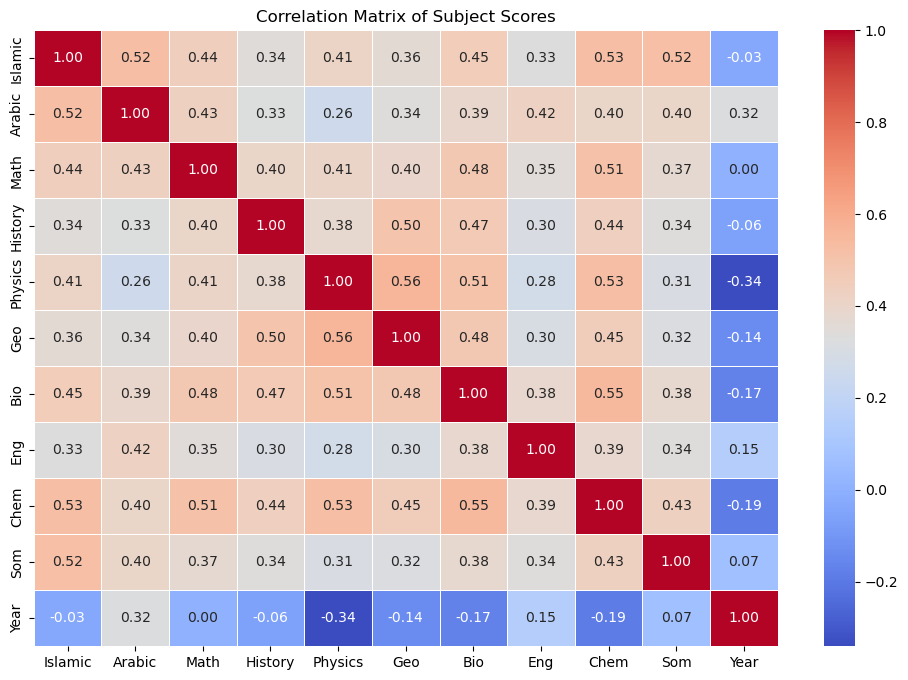

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
data_2018 = pd.read_csv('2018.csv')
data_2019 = pd.read_csv('2019.csv')

# Combine the datasets
combined_data = pd.concat([data_2018, data_2019], ignore_index=True)

# Select numeric columns only
numeric_cols = combined_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
corr_matrix = combined_data[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Subject Scores')
plt.show()


Random Forest Model
Accuracy: 0.9828
Confusion Matrix:
[[6393   62]
 [  88 2185]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6455
           1       0.97      0.96      0.97      2273

    accuracy                           0.98      8728
   macro avg       0.98      0.98      0.98      8728
weighted avg       0.98      0.98      0.98      8728


Decision Tree Model
Accuracy: 0.9665
Confusion Matrix:
[[6299  156]
 [ 136 2137]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6455
           1       0.93      0.94      0.94      2273

    accuracy                           0.97      8728
   macro avg       0.96      0.96      0.96      8728
weighted avg       0.97      0.97      0.97      8728


Logistic Regression Model
Accuracy: 0.9575
Confusion Matrix:
[[6266  189]
 [ 182 2091]]
Classification Report:
              precision

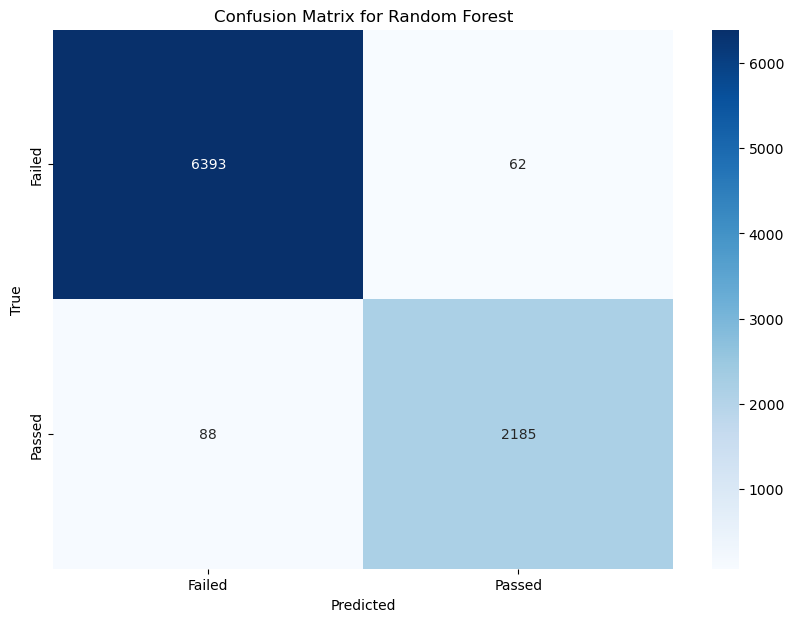

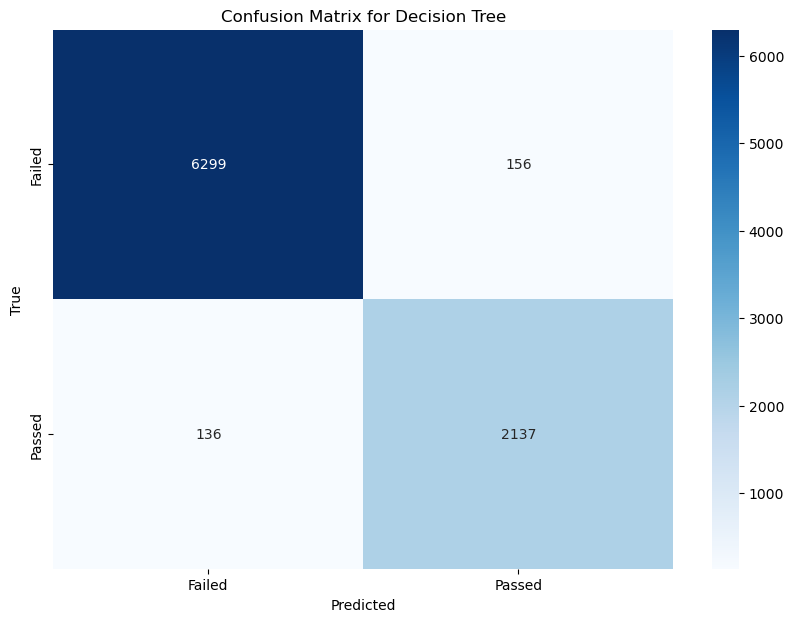

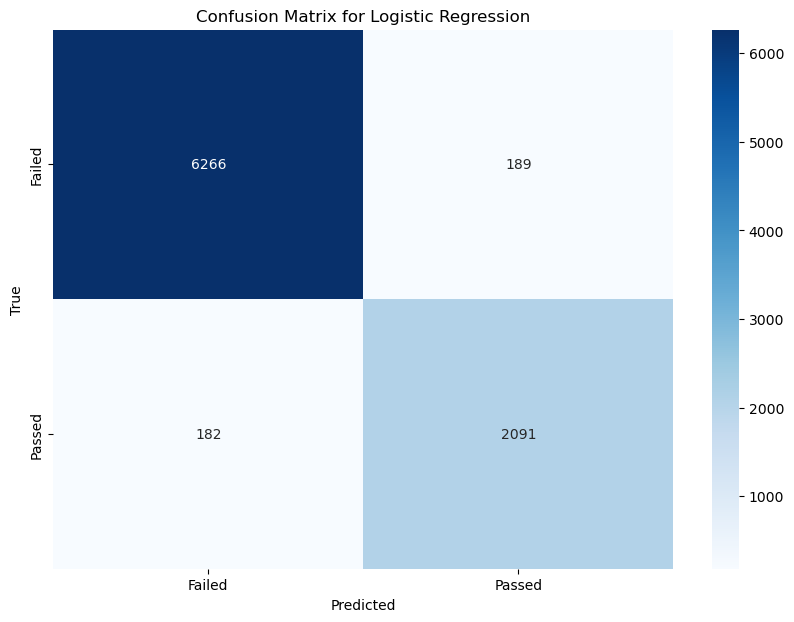

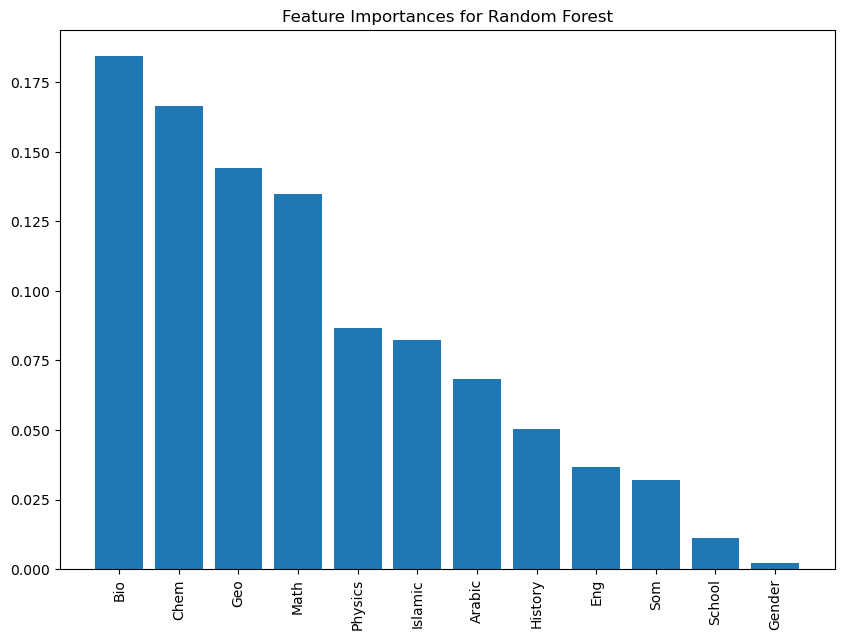

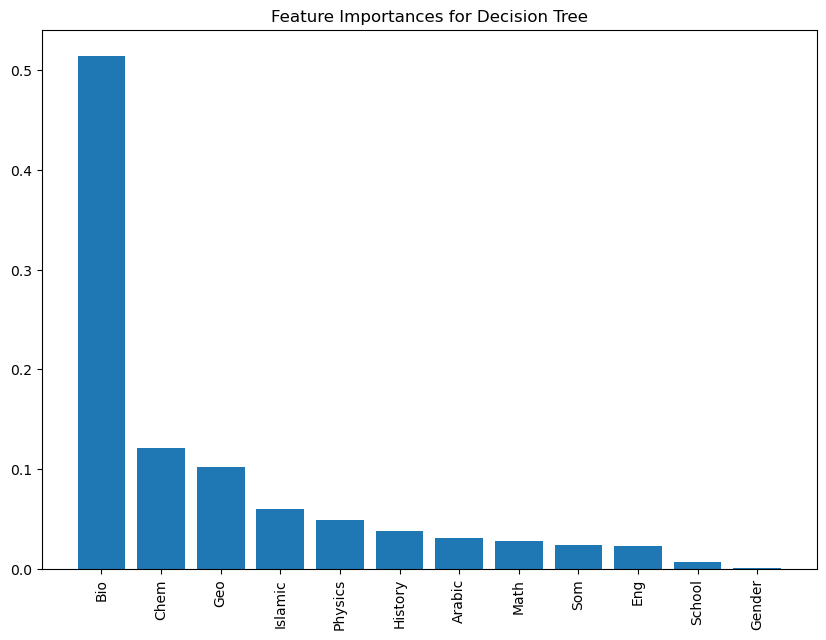

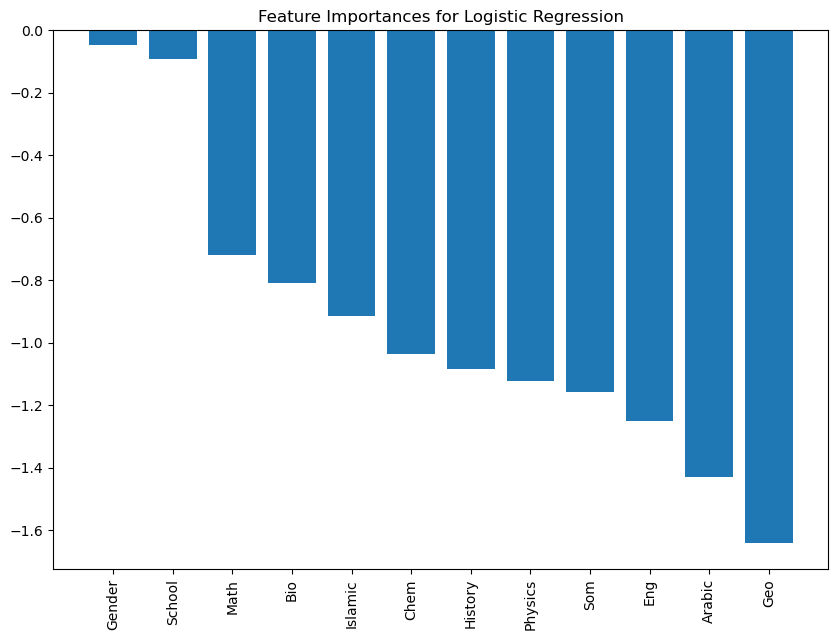

In [12]:
import numpy as np

# Load the datasets
data_2018 = pd.read_csv('2018.csv')
data_2019 = pd.read_csv('2019.csv')

# Combine the datasets
data_combined = pd.concat([data_2018, data_2019], ignore_index=True)

# Select relevant features and target variable
features = ['Islamic', 'Arabic', 'Math', 'History', 'Physics', 'Geo', 'Bio', 'Eng', 'Chem', 'Som', 'Gender', 'School']
X = data_combined[features]
y = data_combined['Decision']

# Encode categorical variables
label_encoder_gender = LabelEncoder()
X.loc[:, 'Gender'] = label_encoder_gender.fit_transform(X['Gender'])

label_encoder_school = LabelEncoder()
X.loc[:, 'School'] = label_encoder_school.fit_transform(X['School'])

label_encoder_decision = LabelEncoder()
y = label_encoder_decision.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Helper function to print model performance
def print_model_performance(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"{model_name} Model")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_true, y_pred)}\n")
    return accuracy

# Train and evaluate the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = print_model_performance("Random Forest", y_test, y_pred_rf)

# Train and evaluate the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = print_model_performance("Decision Tree", y_test, y_pred_dt)

# Train and evaluate the Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = print_model_performance("Logistic Regression", y_test, y_pred_lr)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Failed', 'Passed'], yticklabels=['Failed', 'Passed'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm_rf, "Random Forest")

# Confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plot_confusion_matrix(cm_dt, "Decision Tree")

# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cm_lr, "Logistic Regression")

# Function to plot feature importance
def plot_feature_importance(importances, model_name):
    plt.figure(figsize=(10, 7))
    indices = np.argsort(importances)[::-1]
    plt.title(f"Feature Importances for {model_name}")
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
    plt.xlim([-1, len(importances)])
    plt.show()

# Feature importance for Random Forest
rf_importances = rf_model.feature_importances_
plot_feature_importance(rf_importances, "Random Forest")

# Feature importance for Decision Tree
dt_importances = dt_model.feature_importances_
plot_feature_importance(dt_importances, "Decision Tree")

# Feature importance for Logistic Regression (coefficients)
lr_importances = lr_model.coef_[0]
plot_feature_importance(lr_importances, "Logistic Regression")


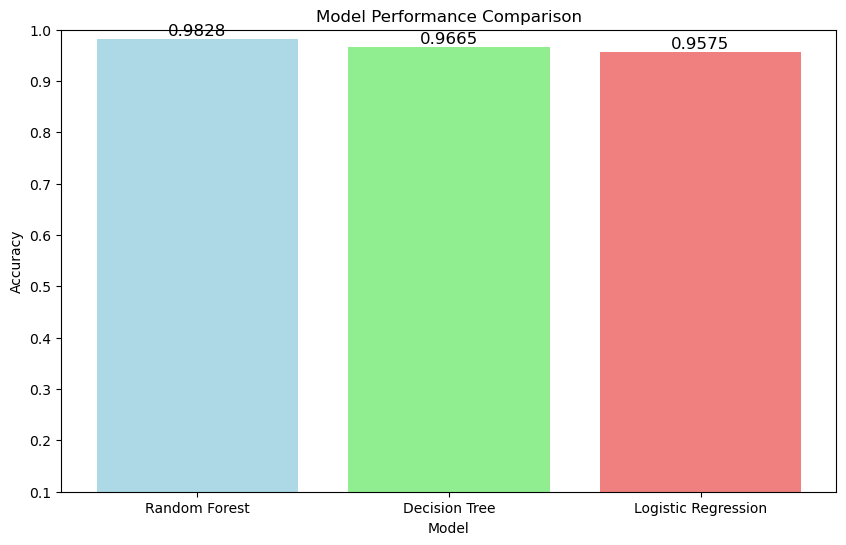

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6455
           1       0.97      0.96      0.97      2273

    accuracy                           0.98      8728
   macro avg       0.98      0.98      0.98      8728
weighted avg       0.98      0.98      0.98      8728


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6455
           1       0.93      0.94      0.94      2273

    accuracy                           0.97      8728
   macro avg       0.96      0.96      0.96      8728
weighted avg       0.97      0.97      0.97      8728


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6455
           1       0.92      0.92      0.92      2273

    accuracy                           0.96      8728
   macro 

In [14]:
#is bar bar dhiga modelada iyadoo loo fiirinaayo metrics kooda

# wixii accuracy oo dhan
accuracy_scores = {
    "Random Forest": accuracy_rf,
    "Decision Tree": accuracy_dt,
    "Logistic Regression": accuracy_lr
}

# Visualize the comparison of accuracy scores(si waadhax eh)
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['lightblue', 'lightgreen', 'lightcoral'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.ylim(0.1, 1)  # Set the y-axis limit for better visualization
for i, v in enumerate(accuracy_scores.values()):
    plt.text(i, v + 0.001, f"{v:.4f}", ha='center', va='bottom', fontsize=12)
plt.show()

# Display the detailed classification reports for each model for further comparison
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


Pass Percentage for 2020: 77.94%
Fail Percentage for 2020: 22.06%


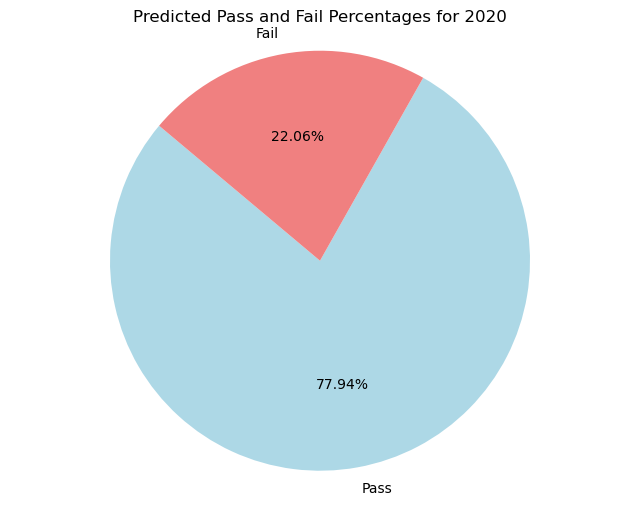

In [25]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the datasets
data_2018 = pd.read_csv('2018.csv')
data_2019 = pd.read_csv('2019.csv')

# Combine the datasets
data_combined = pd.concat([data_2018, data_2019], ignore_index=True)

# Select relevant features
features = ['Islamic', 'Arabic', 'Math', 'History', 'Physics', 'Geo', 'Bio', 'Eng', 'Chem', 'Som', 'Gender', 'School']
X = data_combined[features]
y = data_combined['Decision']

# Encode categorical variables
label_encoder_gender = LabelEncoder()
label_encoder_school = LabelEncoder()

# Apply encoding using .loc to avoid SettingWithCopyWarning
X.loc[:, 'Gender'] = label_encoder_gender.fit_transform(X['Gender'])
X.loc[:, 'School'] = label_encoder_school.fit_transform(X['School'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

def generate_hypothetical_data(base_data, num_students, year, seed):
    np.random.seed(seed)
    hypothetical_data = base_data.sample(n=num_students, replace=True, random_state=seed)
    for column in ['Islamic', 'Arabic', 'Math', 'History', 'Physics', 'Geo', 'Bio', 'Eng', 'Chem', 'Som']:
        trend = np.random.normal(loc=(year - 2019) * 2, scale=5, size=num_students)
        hypothetical_data[column] = hypothetical_data[column] + trend
        hypothetical_data[column] = hypothetical_data[column].clip(lower=0, upper=100)
    return hypothetical_data

# Generate hypothetical data for 2020
num_students_2020 = 33727
hypothetical_data_2020 = generate_hypothetical_data(data_combined, num_students_2020, 2020, seed=42)

# Encode and standardize the hypothetical 2020 data
X_2020 = hypothetical_data_2020[features]
X_2020.loc[:, 'Gender'] = label_encoder_gender.transform(X_2020['Gender'])
X_2020.loc[:, 'School'] = label_encoder_school.transform(X_2020['School'])
X_2020 = scaler.transform(X_2020)

# Make predictions for the hypothetical 2020 data using the Random Forest model
predictions_2020 = random_forest_model.predict(X_2020)

# Calculate pass and fail percentages
pass_count_2020 = sum(predictions_2020 == 'Gudbay')
fail_count_2020 = sum(predictions_2020 == 'Haray')
pass_percentage_2020 = (pass_count_2020 / num_students_2020) * 100
fail_percentage_2020 = (fail_count_2020 / num_students_2020) * 100

print(f"Pass Percentage for 2020: {pass_percentage_2020:.2f}%")
print(f"Fail Percentage for 2020: {fail_percentage_2020:.2f}%")

# Visualize the results
labels = ['Pass', 'Fail']
sizes = [pass_percentage_2020, fail_percentage_2020]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
plt.title('Predicted Pass and Fail Percentages for 2020')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Pass Percentage for 2020: 77.94%
Fail Percentage for 2020: 22.06%


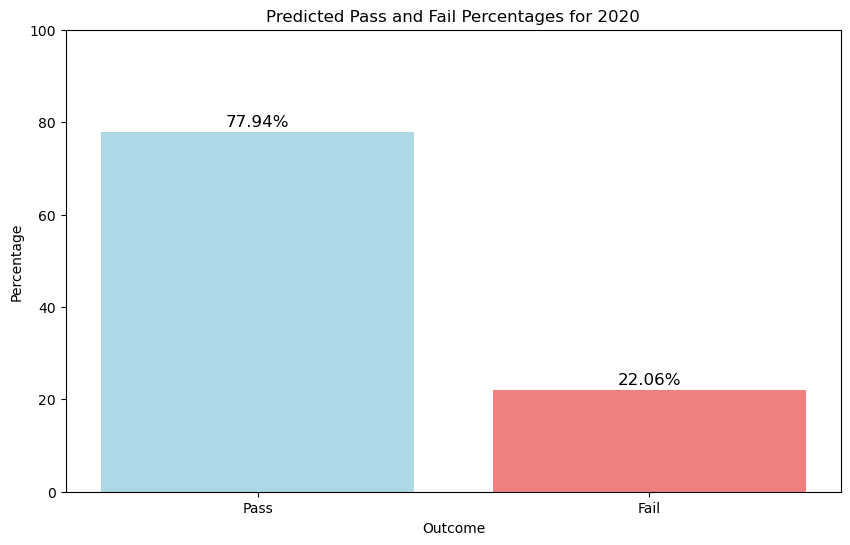

In [24]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the datasets
data_2018 = pd.read_csv('2018.csv')
data_2019 = pd.read_csv('2019.csv')

# Combine the datasets
data_combined = pd.concat([data_2018, data_2019], ignore_index=True)

# Select relevant features
features = ['Islamic', 'Arabic', 'Math', 'History', 'Physics', 'Geo', 'Bio', 'Eng', 'Chem', 'Som', 'Gender', 'School']
X = data_combined[features]
y = data_combined['Decision']

# Encode categorical variables
label_encoder_gender = LabelEncoder()
label_encoder_school = LabelEncoder()

# Apply encoding using .loc to avoid SettingWithCopyWarning
X.loc[:, 'Gender'] = label_encoder_gender.fit_transform(X['Gender'])
X.loc[:, 'School'] = label_encoder_school.fit_transform(X['School'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

def generate_hypothetical_data(base_data, num_students, year, seed):
    np.random.seed(seed)
    hypothetical_data = base_data.sample(n=num_students, replace=True, random_state=seed)
    for column in ['Islamic', 'Arabic', 'Math', 'History', 'Physics', 'Geo', 'Bio', 'Eng', 'Chem', 'Som']:
        trend = np.random.normal(loc=(year - 2019) * 2, scale=5, size=num_students)
        hypothetical_data[column] = hypothetical_data[column] + trend
        hypothetical_data[column] = hypothetical_data[column].clip(lower=0, upper=100)
    return hypothetical_data

# Generate hypothetical data for 2020
num_students_2020 = 33727
hypothetical_data_2020 = generate_hypothetical_data(data_combined, num_students_2020, 2020, seed=42)

# Encode and standardize the 2020 data
X_2020 = hypothetical_data_2020[features]
X_2020.loc[:, 'Gender'] = label_encoder_gender.transform(X_2020['Gender'])
X_2020.loc[:, 'School'] = label_encoder_school.transform(X_2020['School'])
X_2020 = scaler.transform(X_2020)

# Make predictions for the 2020 data using the Random Forest model
predictions_2020 = random_forest_model.predict(X_2020)

# Calculate pass and fail percentages
pass_count_2020 = sum(predictions_2020 == 'Gudbay')
fail_count_2020 = sum(predictions_2020 == 'Haray')
pass_percentage_2020 = (pass_count_2020 / num_students_2020) * 100
fail_percentage_2020 = (fail_count_2020 / num_students_2020) * 100

print(f"Pass Percentage for 2020: {pass_percentage_2020:.2f}%")
print(f"Fail Percentage for 2020: {fail_percentage_2020:.2f}%")

# Visualize the results as a bar chart
labels = ['Pass', 'Fail']
sizes = [pass_percentage_2020, fail_percentage_2020]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(10, 6))
plt.bar(labels, sizes, color=colors)
plt.xlabel('Outcome')
plt.ylabel('Percentage')
plt.title('Predicted Pass and Fail Percentages for 2020')
for i, v in enumerate(sizes):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', va='bottom', fontsize=12)
plt.ylim(0, 100)
plt.show()
